<a href="https://colab.research.google.com/github/RodolfoFerro/curso-ai-basics/blob/main/notebooks/session_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 4 ✨

¡Bienvenidos al módulo 4 🤗! En este módulo veremos cosas prácticas como:
0. Plan de trabajo 👀
    1. Crear u obtener datos
    2. Elegir una clase de modelo
    3. Elegir bien los hiperparámetros
    4. Transformar los datos a np.arrays de features y targets
    5. Ajustar (fit) el modelo a nuestros datos
    6. Predecir para datos no conocidos
1. Regresión Lineal 📈
    1. 1 dimensión
    2. Multiples dimensiones
    3. Ajuste de modelos lineales a datos no lineales
2. Clasificación Sencilla 🐶😼
    1. De puntos
    2. De imágenes de números
    3. De texto (NO NLP, puro ML)
3. Validación de modelos 👍
    1. Accuracy Score
    2. Underfitting & Overfitting y Curvas de aprendizaje
4. Exploración de Modelos 🧐

Este módulo tendrá un montón de cosas muy avanzadas de ML puestas en práctica completamente. Espero que sus cabezas no exploten 🤯 con tanto pero es importantísimo esto para entender el Deep Learning.

## 0. Plan de trabajo 👀
CASI SIEMPRE seguiremos este plan de trabajo para cualquier cosa de ML e incluso de DL. Así que memorícenlo:
1. Crear u obtener datos
2. Elegir una clase de modelo
3. Elegir bien los hiperparámetros
4. Transformar los datos a np.arrays de features y targets
5. Ajustar (fit) el modelo a nuestros datos
6. Predecir para datos no conocidos
7. Validar o valorar nuestras predicciones

## 1. Regresión Lineal 📈

### 1 Dimensión
La ecuación de la línea recta es:

$y = mx + b$

Recordemos el primer punto del tema: ***0. Plan de trabajo 👀*** que está en la tabla de contenidos, es: ***Crear u obtener datos***, en este caso serán datos sintéticos, solo por simplicidad, más adelante en validación de modelos haremos ejercicios con datos reales. ¡Creemos datos sintéticos entonces!

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
rng = np.random.RandomState(42)
data = {
    "years":  10 * rng.rand(50)
}
data["sales"] = 3 * data["years"] - 1 + rng.randn(50)
df = pd.DataFrame(data)
df.head()

Para hacer el punto número ***2. Elegir una clase modelo*** de nuestro plan de trbajo, siempre primero tenemos que visualizar los datos, así podemos tener información sobre la estructura y forma de nuestros datos.

In [ ]:
# "Ver los datos"
plt.plot(df["years"], df["sales"], "o", c = "g")
plt.xlabel("Años de experiencia")
plt.ylabel("Ventas este mes");

Con esta visualización ya sabemos que podemos usar una regresión lineal.

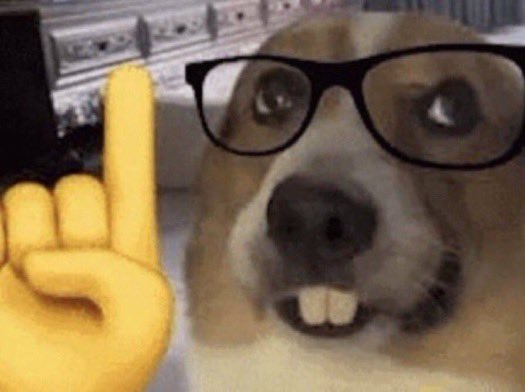

Ya sé que ya sabíamos pero tenemos que asegurarnos.

In [ ]:
# Elegimos el modelo lineal
from sklearn.linear_model import LinearRegression

Siguiendo con la lógica, el punto ***3. Elegir bien los hiperparámetros***, pero la verdad es que la regresión lineal no tiene muchos parámetros que tunear, así que tal vez no tengan tanto sentido...

In [ ]:
model = LinearRegression(fit_intercept=True) # docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model

Muy bien, ahora no podemos pasarle los datos así como así a los modelos, tenemos que seguir el paso ***4. Transformar los datos para que el modelo los lea***, observa que pasa si no hacemos eso:

In [ ]:
model.fit(df["years"], df["sales"])

Feo, entonces vamos a transformar los datos de features y targets en arreglos:

In [ ]:
# Transformar a arrays
x = df["years"].to_numpy()
y = df["sales"].to_numpy()

In [ ]:
# No es suficiente
model.fit(x, y)

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
# Tambien tenemos que transformar su forma
X = x[:, np.newaxis]
# Es lo mismo que:
X = x.reshape(-1, 1)

In [ ]:
print(X.shape)
print(y.shape)

Siguiendo con ***5. Ajustar nuestro modelo a los datos***

In [ ]:
model.fit(X, y)

In [ ]:
# Veamos cositas del modelo
print("m del modelo:", model.coef_[0])
print("b del modelo:", model.intercept_)

Y por fin ***6. Predecir nuevos valores***

In [ ]:
x_fit = np.linspace(-1, 11)
X_fit = x_fit[:, np.newaxis]
y_fit = model.predict(X_fit)

# Nuevo único
x_new = 5.5
X_new = np.array(x_new).reshape(-1, 1)
y_new = model.predict(X_new)

In [ ]:
# Veamos que pasó!
plt.plot(X, y, "o", label = "Datos inciales")
plt.plot(X_new, y_new, "o", c="r", label="Dato a predecir")
plt.plot(X_fit, y_fit, label = "Modelo (datos nuevos)")
plt.xlabel("Años de experiencia")
plt.ylabel("Ventas este mes")
plt.legend(); # Parece que está bien

#### Summary ☝

In [ ]:
# Modelo
model = LinearRegression(fit_intercept=True)
# Fit con datos pre-procesados
model.fit(X, y)
# Prediccion
y_fit = model.predict(X_fit)
new_y = model.predict(X_new)
# Veamos que pasó!
plt.plot(X, y, "o", label = "Datos inciales")
plt.plot(X_new, y_new, "o", c="r", label="Dato a predecir")
plt.plot(X_fit, y_fit, label = "Modelo (datos nuevos)")
plt.xlabel("Años de experiencia")
plt.ylabel("Ventas este mes")
plt.legend();

In [ ]:
# Ejercicio, crea datos sintéticos y haz un regresión lineal que vaya del 2 al 20, con 100 datos esta vez

### Multiples dimensiones (Multiple Linear Regression)
La ecuación del hiperplano es:

$y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$

Seguiremos el plan de trabajo, pero ahora de manera implícita y más rápida.

In [ ]:
import seaborn as sns

In [ ]:
# Obtener o crear los datos
rng = np.random.RandomState(42)
data = {
    "experience_years":  10 * rng.rand(50),
    "age": np.round(20 + 30 * rng.rand(50))
}
data["sales"] = -1 + rng.rand(50) +  5 * data["experience_years"] + 2 * data["age"]
df = pd.DataFrame(data)
df.head()

In [ ]:
# Visualizar datos para elegir un modelo
sns.pairplot(df);

In [ ]:
# Visualizar mas la nesflix
from mpl_toolkits.mplot3d import Axes3D
# Figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Ploteando los datos
ax.scatter(df['experience_years'], df['age'], df['sales'], c='r', marker='o')

# Labels!
ax.set_xlabel('Experience Years')
ax.set_ylabel('Age')
ax.set_zlabel('Sales');

In [ ]:
# Intereactivo
import plotly.express as px
# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x='experience_years', y='age', z='sales', color='experience_years',
                    title='3D Scatter Plot')

# Show the plot
fig.show()

In [ ]:
# Eleccion de modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

In [ ]:
# Transformar datos
X = df[["experience_years", "age"]].to_numpy()
y = df["sales"].to_numpy()

In [ ]:
# Fit
model.fit(X, y)

In [ ]:
# Show plot! Extra steps
import plotly.graph_objects as go
# En lugar de linspace es meshgrid
xx, yy = np.meshgrid(np.linspace(df['experience_years'].min(), df['experience_years'].max(), num=10),
                     np.linspace(df['age'].min(), df['age'].max(), num=10))

# Valores predichos de nuestro modelo en ese meshgrid
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Crear la nueva figura de plotly
fig = go.Figure()
# Igual que antes plotear los puntos
fig.add_trace(go.Scatter3d(x=df['experience_years'], y=df['age'], z=df['sales'],
                           mode='markers', name='Data Points',
                           marker=dict(size=5, color='red')))

# Nuestro modelo!
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, name='Prediction Plane', opacity=0.5))

# Parametros extra
fig.update_layout(title='3D Plot with Linear Regression Plane',
                  scene=dict(xaxis_title='Experience Years',
                             yaxis_title='Age',
                             zaxis_title='Sales'),
                  autosize=True)

fig.show()

In [ ]:
# Ejercicio: Agan el suyo! Sigan la misma idea.
# 1. Creen datos sintéticos con una relación lineal con el target
# 2. Transformen los datos
# 3. Entrenen una regresión lineal
# 4. Visualicen de manera interactiva

### Ajuste de modelos lineales a datos no lineales
Una manera es, por ejemplo, Basis Function Regression, que es tomar la idea de una regresión lineal en múltiples dimensiones (MLR) y aplicarla, claro si solo tenemos una dimensión ¿Cómo hacemos para agregarle más dimensiones?

Bueno, creamos estas otras variables derivadas de la siguiente manera:

$y = a_0 + a_1x + a_2x^2 + a_3x^3 + ... + a_nx^n$

donde $n$ es el grado del polinomio al que queremos ajustar nuestro modelo.

Veamos el ejemplo con los siguientes datos:

In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
data = {
    "time": 24 * np.random.random(50),
}
data["temperature"] = -20*np.sin(data["time"] * 2 * np.pi / 15) + 15 + 7*np.random.random(50)

df = pd.DataFrame(data)
df.head()

In [ ]:
# Ver los datos
plt.plot(data["time"], data["temperature"], "o", label = "Datos")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura")
plt.legend();

En este caso los datos no se ven como datos lineales, pero puede que con ayuda del Basis Function Regression con una base polinómica funcione! Probemos con un polinomio base 3.

In [ ]:
# Primero comprendamos qué hace el PolynomialFeatures! Este es un ejemplo:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3)
poly.fit_transform(x[:, None])

In [ ]:
# con este ejemplo comprendido ahora sí podemos escoger nuestro modelo, será un ajuste lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Vamos a pre-procesar los datos para crear esta matriz de datos
X_original = df["time"].to_numpy().reshape(-1, 1)
X = poly.fit_transform(X_original)
y = df["temperature"]

In [ ]:
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

In [ ]:
X_fit_og = np.linspace(0, 24, 1000).reshape(-1, 1)
y_fit = model.predict(X_fit_og) # Woops tenemos que pre-procesar el X_fit también

In [ ]:
X_fit = poly.fit_transform(X_fit_og)
y_fit = model.predict(X_fit)

In [ ]:
plt.plot(df["time"], df["temperature"], "o", c = "g", label = "Datos")
plt.plot(X_fit_og, y_fit, c = "b", label = "Modelo")
plt.legend();

In [ ]:
# Qué pasa con 7?
poly = PolynomialFeatures(7)
X = poly.fit_transform(X_original)
model = LinearRegression()
model.fit(X, y)
X_fit_og = np.linspace(0, 24, 1000).reshape(-1, 1)
X_fit = poly.fit_transform(X_fit_og)
y_fit = model.predict(X_fit)

plt.plot(df["time"], df["temperature"], "o", c = "g", label = "Datos")
plt.plot(X_fit_og, y_fit, c = "b", label = "Modelo")
plt.legend();

In [ ]:
# Qué pasa con 31?

## Clasificación Sencilla 🐶😼

### 1. De puntos
Vamos a usar un modelo muy sencillo y unos datos ya conocidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

#### ¿Cómo saber si está bien?
Podríamos graficar un montón de puntos!

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
# Ejercicio, hay alguna manera de visualizar mejor la separación entre ambas categorías?

### 2. De imágenes de números

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
# Datos muy grandes :s
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

In [ ]:
# Vamos a reduccionar las dimensiones porque wakala
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

In [ ]:
np.unique(digits.target)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

scatter = plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                      edgecolor='none', alpha=0.5, cmap="Paired")

labels = np.unique(digits.target)
colors = [scatter.cmap(i / max(labels)) for i in labels]
handles = [plt.Line2D([], [], marker='o', linestyle='', color=color,
                      label=label, markersize=10, alpha=0.5) for label, color in zip(labels, colors)]

plt.legend(handles=handles, title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(data_projected, y)
y_model = model.predict(data_projected)

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = X.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(-0.05, 0.05, str(f"{y_model[i]}, {y[i]}"),
            transform=ax.transAxes,
            color='green' if (y[i] == y_model[i]) else 'red')

### 3. Clasificación de Texto (NO NLP)
La suposición gaussiana recién descrita de ninguna manera es la única suposición simple que se podría utilizar para especificar la distribución generativa para cada etiqueta. Otro ejemplo útil es el naive Bayes multinomial, donde se asume que las características son generadas a partir de una distribución multinomial simple. La distribución multinomial describe la probabilidad de observar recuentos entre varias categorías, y por lo tanto, el naive Bayes multinomial es más apropiado para características que representan recuentos o tasas de recuento.

La idea es precisamente la misma que antes, excepto que en lugar de modelar la distribución de datos con la mejor ajuste gaussiano, modelamos la distribución de datos con la mejor ajuste de una distribución multinomial.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Datos
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(categories=categories)

In [ ]:
print(train.data[5])

El `TfidfVectorizer` en `sklearn` (Scikit-learn, una biblioteca de aprendizaje automático para Python) es una herramienta que se utiliza para convertir una colección de documentos de texto en una matriz de características numéricas, usando un enfoque llamado TF-IDF, que significa "Frecuencia de Término - Frecuencia Inversa de Documento".

De manera sencilla, podemos entenderlo así:

- **TF (Frecuencia de Término)**: Esta parte mide cuántas veces aparece un término en un documento. Si un término aparece muchas veces en un documento, es probable que sea importante para ese documento.

- **IDF (Frecuencia Inversa de Documento)**: Esta parte reduce la importancia de los términos que aparecen en muchos documentos de la colección, ya que estos términos son menos únicos y, por tanto, posiblemente menos relevantes para cualquier documento en particular.

El `TfidfVectorizer` combina estas dos ideas y transforma los documentos de texto en vectores de números, donde cada número representa la importancia de un término en un documento en relación con una colección de documentos. Esto es muy útil para tareas como la clasificación de textos y la búsqueda de documentos, ya que permite que los algoritmos de aprendizaje automático trabajen con datos de texto de una manera más efectiva.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)

In [ ]:
# Vamos a predecir cosas
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('Recharging the quantum generator')

In [ ]:
predict_category('I love Jesus')

In [ ]:
predict_category("Vamos a Oasis we")

## Validación de modelos 👍

### Accuracy Score & Confussion Matrix
Una de las maneras que tenemos de validar un modelo de ML, es gracias al accuracy, el concepto se basa en dividir el dataset en dos sub-datasets, el primero es de entrenamiento, y el segundo es de testeo. Veamoslo con un ejemplo.

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.images.shape

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
y = digits.target

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

scatter = plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
                      edgecolor='none', alpha=0.5, cmap="Paired")

labels = np.unique(digits.target)
colors = [scatter.cmap(i / max(labels)) for i in labels]
handles = [plt.Line2D([], [], marker='o', linestyle='', color=color,
                      label=label, markersize=10, alpha=0.5) for label, color in zip(labels, colors)]

plt.legend(handles=handles, title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout();

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data_projected, y, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, y_model)

In [ ]:
sns.heatmap(mat, square=True, annot=True, cbar=True, cmap = sns.color_palette("YlOrBr"), fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

### Underfitting & Overfitting

Ahora que hemos visto los conceptos básicos de la validación y la validación cruzada, profundizaremos un poco más en la selección del modelo y la selección de hiperparámetros. Estos temas son algunos de los aspectos más importantes en la práctica del aprendizaje automático, y a menudo encuentro que esta información se pasa por alto en tutoriales introductorios de aprendizaje automático.

De importancia fundamental es la siguiente pregunta: si nuestro estimador no está rindiendo bien, ¿cómo debemos proceder? Hay varias respuestas posibles:

1. Usar un modelo más complicado/más flexible.
2. Usar un modelo menos complicado/menos flexible.
3. Recopilar más muestras de entrenamiento.

La respuesta a esta pregunta a menudo es contraintuitiva. En particular, a veces usar un modelo más complicado dará peores resultados, ¡y agregar más muestras de entrenamiento puede no mejorar los resultados! La capacidad para determinar qué pasos mejorarán tu modelo es lo que distingue a los practicantes exitosos de aprendizaje automático de los no exitosos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Datos
n_datos = 10
x = np.linspace(0, 1, n_datos)
y = np.sin(2 * np.pi * x) - 0.25 + np.random.rand(n_datos) * 0.5

In [ ]:
x.shape, y.shape

In [ ]:
# Visualización
plt.scatter(x, y, facecolors = "none", edgecolors = "b", label="Datos", s=50)
x_og = np.linspace(0, 1, 1000)
y_og = np.sin(2*np.pi*x_og)
plt.plot(x_og, y_og, c = "g", label = "Distribucion OG")
plt.legend();

In [ ]:
# Construir polinomios
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
X = x.reshape(-1, 1)
X_og = x_og.reshape(-1, 1)
predicted_ys = []
grades = [0, 1, 3, 9]
for index, grade in enumerate(grades):
    current_poly = PolynomialFeatures(grade)
    current_X = current_poly.fit_transform(X)
    new_X_og = current_poly.transform(X_og)
    current_model = LinearRegression()
    current_model.fit(current_X, y)
    current_y = current_model.predict(new_X_og)
    predicted_ys.append(current_y)

In [ ]:
# Visualización
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
x_og = np.linspace(0, 1, 1000)
y_og = np.sin(2*np.pi*x_og)
for index in range(4):
    i = index // 2
    j = index % 2
    ax[i][j].scatter(x, y, facecolors = "none", edgecolors = "b", label="Datos", s=50)
    ax[i][j].plot(x_og, y_og, c = "g", label = "Distribucion OG")
    ax[i][j].plot(X_og, predicted_ys[index], c = "r", label = f"Modelo grado {grades[index]}")
    ax[i][j].legend();

Learning Curves

In [ ]:
# Vamos a avanzar
# Datos
n_datos = 20
rng = np.random.RandomState(42)
x = np.linspace(0, 1, n_datos)
y = np.sin(2 * np.pi * x) - 0.25 + rng.rand(n_datos) * 0.5
X = x.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=6)

In [ ]:
# Visualización
plt.scatter(X_train, y_train, facecolors = "none", edgecolors = "b", label="Entramiento", s=50)
plt.scatter(X_test, y_test, facecolors = "none", edgecolors = "r", label="Testeo", s=50)
x_og = np.linspace(0, 1, 1000)
y_og = np.sin(2*np.pi*x_og)
plt.plot(x_og, y_og, c = "g", label = "Distribucion OG")
plt.legend();

In [ ]:
# Construir polinomios
scores_train = []
scores_test = []
new_grades = range(0, 10)
for grade in new_grades:
    current_poly = PolynomialFeatures(grade)
    current_X_train = current_poly.fit_transform(X_train)
    current_X_test = current_poly.transform(X_test)
    current_model = LinearRegression()

    current_model.fit(current_X_train, y_train)

    current_y_test = current_model.predict(current_X_test)
    current_y_train = current_model.predict(current_X_train)

    scores_train.append(mean_squared_error(y_train, current_y_train))
    scores_test.append(mean_squared_error(y_test, current_y_test))

In [ ]:
plt.scatter(new_grades, scores_train, label = "Entrenamiento", facecolor = "none", edgecolor = "b")
plt.plot(new_grades, scores_train, c = "b")
plt.scatter(new_grades, scores_test, label = "Testeo", facecolor = "none", edgecolor = "r")
plt.plot(new_grades, scores_test, c = "r")
plt.ylabel("ERMS")
plt.xlabel("Grado del polinomio")
plt.ylim(0, 0.8)
plt.xticks(range(0, 10))
plt.legend();

#### Probar con más datos!

In [ ]:
# Datos
n_datos = 10
x1 = np.linspace(0, 1, n_datos)
y1 = np.sin(2 * np.pi * x1) - 0.25 + np.random.rand(n_datos) * 0.5
X1 = x1.reshape(-1, 1)
n_datos = 100
x2 = np.linspace(0, 1, n_datos)
y2 = np.sin(2 * np.pi * x2) - 0.25 + np.random.rand(n_datos) * 0.5
X2 = x2.reshape(-1, 1)

In [ ]:
x_og = np.linspace(0, 1, 1000)
X_og = x_og.reshape(-1, 1)

poly = PolynomialFeatures(9)
X1_train = poly.fit_transform(X1)
new_X_og = poly.transform(X_og)
model = LinearRegression()
model.fit(X1_train, y1)
pred_y1 = model.predict(new_X_og)

X2_train = poly.fit_transform(X2)
model = LinearRegression()
model.fit(X2_train, y2)
pred_y2 = model.predict(new_X_og)

In [ ]:
# Visualización
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
x_og = np.linspace(0, 1, 1000)
y_og = np.sin(2*np.pi*x_og)
ax[0].scatter(X1, y1, facecolors = "none", edgecolors = "b", label="Datos", s=50)
ax[0].plot(x_og, y_og, c = "g", label = "Distribucion OG")
ax[0].plot(x_og, pred_y1, c = "r", label = "Polinomio 9, 15 datos")
ax[0].legend()

ax[1].scatter(X2, y2, facecolors = "none", edgecolors = "b", label="Datos", s=50)
ax[1].plot(x_og, y_og, c = "g", label = "Distribucion OG")
ax[1].plot(x_og, pred_y2, c = "r", label = "Polinomio 9, 100 datos")
ax[1].legend();